In [1]:
import awkward as ak
import numpy as np
from tqdm import tqdm
import ehrapy as ep
import dask.array as da
import dask.dataframe as dd
import anndata as ad
import dask_awkward as dak
from ehrdata import OMOP
import pandas as pd

/opt/anaconda3/envs/ehrapy_latents/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
omop = OMOP(folder_path="/Users/xinyuezhang/BlendedICU/BlendedICU/OMOP-CDM-mimiciv", delimiter=';')

In [3]:
# Load some tables
adata = omop.load(level='stay_level')

reading table [visit_occurrence]


reading table [person]
reading table [death]
2024-01-26 16:20:29,723 - root INFO - Transformed passed dataframe into an AnnData object with n_obs x n_vars = `69337` x `2`.


In [5]:
omop.add_additional_column(column_name='time', type='int')
omop.add_additional_column(column_name='unit_source', type='str')
omop.add_additional_column(column_name='value_source_value', type='float')

omop.set_path(table_name='measurement', file_path="/Users/xinyuezhang/BlendedICU/BlendedICU/OMOP-CDM-mimiciv/measurement")

## Explore features in MIMIC-IV OMOP dataset

,feature_name,observation_concept_id,count
0,Body weight,3711521,69337
1,Normal height,4203099,69337
2,Age group,44804452,69337


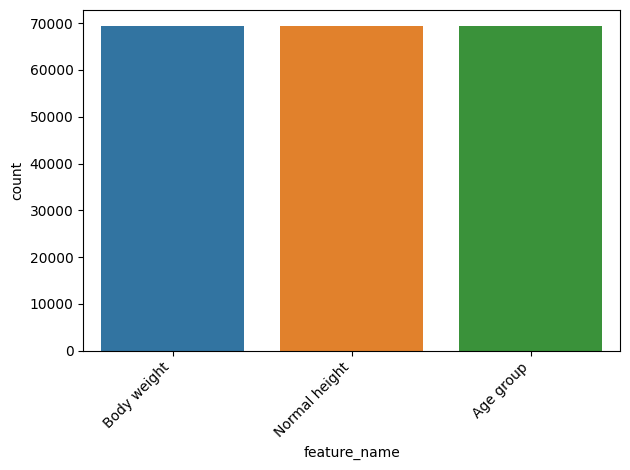

In [5]:
# Explore most frequent n features in observation table
observation_feature_counts = omop.feature_counts(source='observation', number=20)
observation_feature_counts.head()

Couldn't find concept [4099154] in concept table!

,feature_name,measurement_concept_id,count
0,Body height,607590,48258552
1,4099154,4099154,48258552
2,Mean blood pressure,4239021,12422271
3,Ventilator rate,4108138,12422271
4,Invasive mean arterial pressure,4108290,12422271


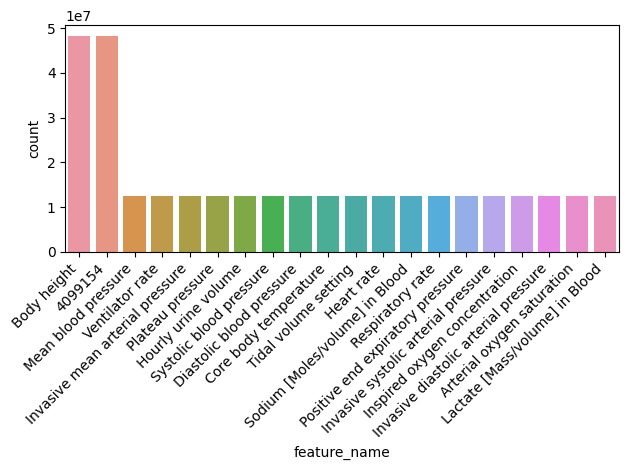

In [9]:
# Explore most frequent 20 features in measurement table

measurement_feature_counts = omop.feature_counts(source='measurement', number=20)
measurement_feature_counts.head()

## Get aggregation statistics of selected features (min/max/mean/count/std)

In [8]:
features = ['Diastolic blood pressure', 'Inspired oxygen concentration', 'Glasgow coma score eye opening', 'Glasgow coma score motor', 'Glasgow coma score total', 'Glasgow coma score verbal', 'Glucose [Moles/volume] in Blood', 'Heart rate', 'Mean blood pressure', 'Arterial oxygen saturation', 'Respiratory rate', 'Systolic blood pressure', 'pH']
adata = omop.get_feature_statistics(adata, source='measurement', level='stay_level', features=features, verbose=False)

# Store these statistics in X
adata.var

2024-01-26 12:31:45,876 - root INFO - Added `['Diastolic blood pressure_min', 'Diastolic blood pressure_max', 'Diastolic blood pressure_mean', 'Diastolic blood pressure_std', 'Diastolic blood pressure_count', 'Inspired oxygen concentration_min', 'Inspired oxygen concentration_max', 'Inspired oxygen concentration_mean', 'Inspired oxygen concentration_std', 'Inspired oxygen concentration_count', 'Glasgow coma score eye opening_min', 'Glasgow coma score eye opening_max', 'Glasgow coma score eye opening_mean', 'Glasgow coma score eye opening_std', 'Glasgow coma score eye opening_count', 'Glasgow coma score motor_min', 'Glasgow coma score motor_max', 'Glasgow coma score motor_mean', 'Glasgow coma score motor_std', 'Glasgow coma score motor_count', 'Glasgow coma score total_min', 'Glasgow coma score total_max', 'Glasgow coma score total_mean', 'Glasgow coma score total_std', 'Glasgow coma score total_count', 'Glasgow coma score verbal_min', 'Glasgow coma score verbal_max', 'Glasgow coma scor

""
year_of_birth
gender_source_value
Diastolic blood pressure_min
Diastolic blood pressure_max
Diastolic blood pressure_mean
...
Systolic blood pressure_min
Systolic blood pressure_max
Systolic blood pressure_mean
Systolic blood pressure_std


In [8]:
adata = omop.extract_features(adata, source='measurement', features=features)

Adding feature [Systolic blood pressure] into adata
Adding feature [pH] into adata
Adding feature [Diastolic blood pressure] into adata
Adding feature [Glasgow coma score verbal] into adata
Adding feature [Glucose [Moles/volume] in Blood] into adata
Adding feature [Mean blood pressure] into adata
Adding feature [Glasgow coma score eye opening] into adata
Adding feature [Inspired oxygen concentration] into adata
Adding feature [Heart rate] into adata
Adding feature [Respiratory rate] into adata
Adding feature [Glasgow coma score total] into adata
Adding feature [Arterial oxygen saturation] into adata
Adding feature [Glasgow coma score motor] into adata


In [10]:
adata

AnnData object with n_obs × n_vars = 69337 × 2
    obs: 'birth_datetime', 'visit_type_concept_id', 'Unnamed: 0', 'death_date', 'visit_concept_id', 'discharged_to_source_value', 'person_source_value', 'gender_concept_id', 'visit_source_value', 'visit_end_datetime', 'death_datetime', 'visit_start_date', 'visit_end_date', 'visit_start_datetime', 'admitted_from_source_value', 'location_id'
    uns: 'numerical_columns', 'non_numerical_columns'
    obsm: 'Systolic blood pressure', 'pH', 'Diastolic blood pressure', 'Glasgow coma score verbal', 'Glucose [Moles/volume] in Blood', 'Mean blood pressure', 'Glasgow coma score eye opening', 'Inspired oxygen concentration', 'Heart rate', 'Respiratory rate', 'Glasgow coma score total', 'Arterial oxygen saturation', 'Glasgow coma score motor'
    layers: 'original'

In [86]:
ak_array = ak.Array([{"a" : [1, 2, 3, 4, np.nan], "b": [np.nan, 7, 8, 9, 10]}, {"a" : [11, 12, 13, np.nan, 14], "b": [17, np.nan, 18, 19, 20]}])
ak_array

<Array [{a: [1, ...], b: [...]}, {...}] type='2 * {a: var * float64, b: var...'>

In [163]:
ak.is_none(ak.nan_to_none(adata.obsm['Systolic blood pressure']), axis=1)

<Array [{value_as_number: [...], ...}, ...] type='69337 * {value_as_number:...'>

In [166]:
ak_array = adata.obsm['Systolic blood pressure']

In [ ]:
adata.obsm['Systolic blood pressure']

In [175]:

combined_mask = ak.zeros_like(ak_array[ak_array.fields[0]], dtype=bool)

# Update the combined mask based on the presence of None in each field
for field in ak_array.fields:
    field_mask = ak.is_none(ak.nan_to_none(ak_array[field]), axis=1)
    combined_mask = combined_mask | field_mask

ak_array = ak_array[~combined_mask]


In [179]:
def drop_nan(adata, 
                key: str,
                slot: str = 'obsm', 
                ):
    if slot == 'obsm':
        ak_array = adata.obsm[key]
        combined_mask = ak.zeros_like(ak_array[ak_array.fields[0]], dtype=bool)

        # Update the combined mask based on the presence of None in each field
        for field in ak_array.fields:
            field_mask = ak.is_none(ak.nan_to_none(ak_array[field]), axis=1)
            combined_mask = combined_mask | field_mask

        ak_array = ak_array[~combined_mask]
        adata.obsm[key] = ak_array
        
        
    return adata

In [180]:
adata = drop_nan(adata=adata, key='Systolic blood pressure')

AnnData object with n_obs × n_vars = 69337 × 2
    obs: 'birth_datetime', 'visit_type_concept_id', 'Unnamed: 0', 'death_date', 'visit_concept_id', 'discharged_to_source_value', 'person_source_value', 'gender_concept_id', 'visit_source_value', 'visit_end_datetime', 'death_datetime', 'visit_start_date', 'visit_end_date', 'visit_start_datetime', 'admitted_from_source_value', 'location_id'
    uns: 'numerical_columns', 'non_numerical_columns'
    obsm: 'Systolic blood pressure', 'pH', 'Diastolic blood pressure', 'Glasgow coma score verbal', 'Glucose [Moles/volume] in Blood', 'Mean blood pressure', 'Glasgow coma score eye opening', 'Inspired oxygen concentration', 'Heart rate', 'Respiratory rate', 'Glasgow coma score total', 'Arterial oxygen saturation', 'Glasgow coma score motor'

In [173]:
ak_array[~(ak.is_none(ak.nan_to_none(ak_array['value_as_number']), axis=1) | ak.is_none(ak.nan_to_none(ak_array['time']), axis=1))]

<Array [{value_as_number: [...], ...}, ...] type='69337 * {value_as_number:...'>

In [167]:
mask = ak.Array(ak.to_numpy(ak.is_none(ak.nan_to_none(ak_array['value_as_number']), axis=1)) | ak.to_numpy(ak.is_none(ak.nan_to_none(ak_array['time']), axis=1)))

╭─────────────────────────────────────── Traceback (most recent call last) ───────────────────────────────────────╮
│ /opt/anaconda3/envs/ehrapy_latents/lib/python3.9/site-packages/awkward/_dispatch.py:62 in dispatch              │
│                                                                                                                 │
│   59 │   │   │   │                                                                                              │
│   60 │   │   │   │   # Failed to find a custom overload, so resume the original function                        │
│   61 │   │   │   │   try:                                                                                       │
│ ❱ 62 │   │   │   │   │   next(gen_or_result)                                                                    │
│   63 │   │   │   │   except StopIteration as err:                                                               │
│   64 │   │   │   │   │   return err.value                                                                       │
│   65 │   │   │   │   else:                                                                                      │
│                                                                                                                 │
│ /opt/anaconda3/envs/ehrapy_latents/lib/python3.9/site-packages/awkward/operations/ak_to_numpy.py:48 in to_numpy │
│                                                                                                                 │
│   45 │   yield (array,)                                                                                         │
│   46 │                                                                                                          │
│   47 │   # Implementation                                                                                       │
│ ❱ 48 │   return _impl(array, allow_missing)                                                                     │
│   49                                                                                                            │
│   50                                                                                                            │
│   51 def _impl(array, allow_missing):                                                                           │
│                                                                                                                 │
│ /opt/anaconda3/envs/ehrapy_latents/lib/python3.9/site-packages/awkward/operations/ak_to_numpy.py:60 in _impl    │
│                                                                                                                 │
│   57 │   │   backend = NumpyBackend.instance()                                                                  │
│   58 │   │   numpy_layout = layout.to_backend(backend)                                                          │
│   59 │   │                                                                                                      │
│ ❱ 60 │   │   return numpy_layout.to_backend_array(allow_missing=allow_missing)                                  │
│   61                                                                                                            │
│                                                                                                                 │
│ /opt/anaconda3/envs/ehrapy_latents/lib/python3.9/site-packages/awkward/contents/content.py:1021 in              │
│ to_backend_array                                                                                                │
│                                                                                                                 │
│   1018 │   │   │   backend = self._backend                                                                      │
│   1019 │   │   else:                                                                                            │
│   1020 │   │   │   backend = regularize_backend(backen

In [154]:
mask

<Array [[True, False, False, False, True], [...]] type='2 * 5 * bool'>

In [156]:
ak_array

<Array [{a: [1, ...], b: [...]}, {...}] type='2 * {a: var * float64, b: var...'>

In [155]:
ak_array[~mask]

<Array [{a: 2, b: 7}, {...}, ..., {a: 14, ...}] type='6 * {a: float64, b: f...'>

In [159]:
mask

<Array [[True, False, False, False, True], [...]] type='2 * 5 * bool'>

In [152]:
ak_array[~ak.Array(mask)]

<Array [{a: 2, b: 7}, {...}, ..., {a: 14, ...}] type='6 * {a: float64, b: f...'>

In [146]:
mask_2 = ak.Array([{'a': [ True, False, False, False,  True], 'b': [ True, False, False, False,  True]}, {'a': [False,  True, False,  True, False], 'b': [False,  True, False,  True, False]}])

In [148]:
mask_2

<Array [{a: [True, ...], b: [...]}, {...}] type='2 * {a: var * bool, b: var...'>

In [160]:
mask

<Array [[True, False, False, False, True], [...]] type='2 * 5 * bool'>

In [162]:
mask_2['a']

<Array [[True, False, False, False, True], [...]] type='2 * var * bool'>

In [151]:
ak_array[~mask_2['a']]

<Array [{a: [2, ..., 4], b: [...]}, {...}] type='2 * {a: var * float64, b: ...'>

In [140]:
ak.Array(mask)

<Array [[True, False, False, False, True], [...]] type='2 * 5 * bool'>

In [101]:
mask

array([[ True, False, False, False,  True],
       [False,  True, False,  True, False]])

In [141]:
ak_array[~mask]

<Array [{a: 2, b: 7}, {...}, ..., {a: 14, ...}] type='6 * {a: float64, b: f...'>

In [103]:
len(ak_array)

In [104]:
len(mask)

In [124]:
ak_array

<Array [{a: [1, ...], b: [...]}, {...}] type='2 * {a: var * float64, b: var...'>

In [123]:
mask['a']

<Array [[True, False, False, False, True], [...]] type='2 * var * bool'>

In [127]:
mask['a']

<Array [[True, False, False, False, True], [...]] type='2 * var * bool'>

In [132]:
ak_array

<Array [{a: [1, ...], b: [...]}, {...}] type='2 * {a: var * float64, b: var...'>

In [133]:
ak.Array(mask)

array([[ True, False, False, False,  True],
       [False,  True, False,  True, False]])

In [134]:
ak_array[~ak.Array(mask)]

<Array [{a: 2, b: 7}, {...}, ..., {a: 14, ...}] type='6 * {a: float64, b: f...'>

In [122]:
ak_array['b'][mask['b']]

<Array [[nan, 10], [nan, 19]] type='2 * var * float64'>

In [116]:
ak_array[mask]

╭─────────────────────────────────────── Traceback (most recent call last) ───────────────────────────────────────╮
│ /opt/anaconda3/envs/ehrapy_latents/lib/python3.9/site-packages/awkward/highlevel.py:1062 in __getitem__         │
│                                                                                                                 │
│   1059 │   │   """                                                                                              │
│   1060 │   │   with ak._errors.SlicingErrorContext(self, where):                                                │
│   1061 │   │   │   return wrap_layout(                                                                          │
│ ❱ 1062 │   │   │   │   prepare_layout(self._layout[where]),                                                     │
│   1063 │   │   │   │   self._behavior,                                                                          │
│   1064 │   │   │   │   allow_other=True,                                                                        │
│   1065 │   │   │   │   attrs=self._attrs,                                                                       │
│                                                                                                                 │
│ /opt/anaconda3/envs/ehrapy_latents/lib/python3.9/site-packages/awkward/contents/content.py:519 in __getitem__   │
│                                                                                                                 │
│    516 │   │   │   )                                                                                            │
│    517 │                                                                                                        │
│    518 │   def __getitem__(self, where):                                                                        │
│ ❱  519 │   │   return self._getitem(where)                                                                      │
│    520 │                                                                                                        │
│    521 │   def _getitem(self, where):                                                                           │
│    522 │   │   if is_integer_like(where):                                                                       │
│                                                                                                                 │
│ /opt/anaconda3/envs/ehrapy_latents/lib/python3.9/site-packages/awkward/contents/content.py:572 in _getitem      │
│                                                                                                                 │
│    569 │   │   │   │   return out._getitem_at(0)                                                                │
│    570 │   │                                                                                                    │
│    571 │   │   elif isinstance(where, ak.highlevel.Array):                                                      │
│ ❱  572 │   │   │   return self._getitem(where.layout)                                                           │
│    573 │   │                                                                                                    │
│    574 │   │   # Convert between nplikes of different backends                                                  │
│    575 │   │   elif (                                                                                           │
│                                                                                                                 │
│ /opt/anaconda3/envs/ehrapy_latents/lib/python3.9/site-packages/awkward/contents/content.py:647 in _getitem      │
│                                                                                                                 │
│    644 │   │   │   return where.to_NumpyArray(np.int64)                                                         │
│    645 │   │                                          

In [115]:
ak.mask(ak_array, mask)

<Array [{a: [1, ...], b: [...]}, {...}] type='2 * {a: var * ?float64, b: va...'>

In [98]:
ak.to_numpy(ak.is_none(ak.nan_to_none(ak_array['a']), axis=1)) 

array([[False, False, False, False,  True],
       [False, False, False,  True, False]])

In [96]:
ak.to_numpy(ak.is_none(ak.nan_to_none(ak_array['b']), axis=1))

array([[ True, False, False, False, False],
       [False,  True, False, False, False]])

In [90]:
.is

<Array [[1, 2, 3, 4, nan], [11, 12, ..., 14]] type='2 * var * float64'>

In [89]:
ak_array.fields

['a', 'b']

In [88]:
for item in ak_array:
    print(item)

{a: [1, 2, 3, 4, nan], b: [nan, 7, 8, 9, 10]}
{a: [11, 12, 13, nan, 14], b: [17, nan, ..., 19, 20]}


In [83]:
item.attrs

In [84]:
item.fields

['a', 'b']

In [82]:
type(item)

awkward.highlevel.Record

In [59]:
is_none = ak.nan_to_none(ak_array)

In [65]:
is_none["a"][0]

<Array [1, 2, 3, 4, None] type='5 * ?float64'>

In [62]:
is_none["b"]

<Array [[None, 7, 8, 9, 10]] type='1 * var * ?float64'>

In [58]:
ak.drop_none(ak.nan_to_none(ak_array), axis=-2)

<Array [{a: [1, ..., None], b: [...]}] type='1 * {a: var * ?float64, b: var...'>

In [50]:
ak.nan_to_num(ak_array)

<Array [{a: [1, 2, ..., 0], b: [...]}] type='1 * {a: var * float64, b: var ...'>

In [49]:
ak.is_none(ak_array, axis=1)

<Array [{a: [False, ...], b: [...]}] type='1 * {a: var * bool, b: var * bool}'>

In [43]:
ak.drop_none(ak_array)

<Array [{a: [1, ..., nan], b: [...]}] type='1 * {a: var * float64, b: var *...'>

In [69]:
adata.obsm['Systolic blood pressure']

<Array [{value_as_number: [...], ...}, ...] type='69337 * {value_as_number:...'>

In [11]:
adata.obsm['Diastolic blood pressure']

<Array [{value_as_number: [...], ...}, ...] type='69337 * {value_as_number:...'>

In [28]:
adata.X[:, 0] = adata.X[:, 0].astype(str)

In [26]:
adata.X

array([[1958, 1.0],
       [1958, 1.0],
       [1958, 1.0],
       ...,
       [1947, 0.0],
       [1938, 0.0],
       [1991, 1.0]], dtype=object)

In [32]:
del(adata.layers['original'])

In [33]:
adata

AnnData object with n_obs × n_vars = 69337 × 2
    obs: 'birth_datetime', 'visit_type_concept_id', 'Unnamed: 0', 'death_date', 'visit_concept_id', 'discharged_to_source_value', 'person_source_value', 'gender_concept_id', 'visit_source_value', 'visit_end_datetime', 'death_datetime', 'visit_start_date', 'visit_end_date', 'visit_start_datetime', 'admitted_from_source_value', 'location_id'
    uns: 'numerical_columns', 'non_numerical_columns'
    obsm: 'Systolic blood pressure', 'pH', 'Diastolic blood pressure', 'Glasgow coma score verbal', 'Glucose [Moles/volume] in Blood', 'Mean blood pressure', 'Glasgow coma score eye opening', 'Inspired oxygen concentration', 'Heart rate', 'Respiratory rate', 'Glasgow coma score total', 'Arterial oxygen saturation', 'Glasgow coma score motor'

In [35]:
adata.write_h5ad("adata.h5ad")

In [15]:
ak.to_dataframe(adata.obsm['Diastolic blood pressure'][0])

,value_as_number,time
entry,,
0,NaN,1251.0
1,NaN,5211.0
2,NaN,5391.0
3,NaN,5811.0
4,NaN,7311.0
...,...,...
106,NaN,165891.0
107,NaN,167811.0
108,55.0,167871.0


In [16]:
ak.to_dataframe(adata.obsm['Diastolic blood pressure'][11])

,value_as_number,time
entry,,
0,59.0,3914.0
1,NaN,3974.0
2,NaN,4394.0
3,NaN,5714.0
4,58.0,5774.0
5,NaN,9314.0
6,NaN,12914.0
7,70.0,15074.0
8,NaN,16514.0


<Record {value_as_number: [...], time: ..., ...} type='{value_as_number: va...'>

## Data Subset
In in-hospital mortality prediction task `period_length` is always 48 hours

## Time Series Conversion

Pivot the time series data for each visit

In [40]:
def convert_events_to_timeseries(df_feature, visit_occurrence_id, col_time='time', col_value='value_as_number', col_variable='measurement_name', variables=None):
    #if not variables:
    #    variables = list(df_feature[[col_variable]].unique())
    metadata = df_feature[[col_time]].sort_values(by=[col_time])\
                    .drop_duplicates(keep='first').set_index(col_time)
    timeseries = df_feature[[col_time, col_variable, col_value]]\
                    .sort_values(by=[col_time, col_variable, col_value], axis=0)\
                    .drop_duplicates(subset=[col_time, col_variable], keep='last')
    timeseries = timeseries.pivot(index=col_time, columns=col_variable, values=col_value)\
                    .merge(metadata, left_index=True, right_index=True)\
                    .sort_index(axis=0).reset_index()
    for v in variables:
        if v not in timeseries:
            timeseries[v] = np.nan
    timeseries = timeseries[[col_time] + variables]
    
    return timeseries

def wrapper(df, group_key, variables):
    return convert_events_to_timeseries(df_feature=df, visit_occurrence_id=group_key, variables=variables)

In [76]:
da_measurement = dd.read_parquet('/Users/xinyuezhang/BlendedICU/BlendedICU/OMOP-CDM-mimiciv/measurement', columns=['visit_occurrence_id', 'time', 'value_as_number', 'measurement_concept_id'])
# Select featrues
da_measurement = da_measurement[da_measurement.measurement_concept_id.isin(list(info_df.feature_id))]
# Select time
da_measurement = da_measurement[(da_measurement.time >= 0) & (da_measurement.time <= 48*60*60)]
#da_measurement['measurement_name'] = da_measurement.measurement_concept_id.replace(info_dict)

da_measurement_in_memory = da_measurement.compute()

In [80]:
info_dict

{4154790: 'Diastolic blood pressure',
 4353936: 'Inspired oxygen concentration',
 3016335: 'Glasgow coma score eye opening',
 3008223: 'Glasgow coma score motor',
 3007194: 'Glasgow coma score total',
 3009094: 'Glasgow coma score verbal',
 3020491: 'Glucose [Moles/volume] in Blood',
 4239408: 'Heart rate',
 4239021: 'Mean blood pressure',
 40483579: 'Arterial oxygen saturation',
 4313591: 'Respiratory rate',
 4152194: 'Systolic blood pressure',
 8482: 'pH'}

In [78]:
len(da_measurement_in_memory)

In [79]:
da_measurement_in_memory.head()

,visit_occurrence_id,time,value_as_number,measurement_concept_id,measurement_name
12,2046172,358.0,NaN,4239408,Heart rate
13,2046172,418.0,71.0,4239408,Heart rate
14,2046172,1198.0,NaN,4239408,Heart rate
15,2046172,1558.0,NaN,4239408,Heart rate
16,2046172,3958.0,58.0,4239408,Heart rate


In [83]:
da_measurement_in_memory = da_measurement_in_memory.dropna()

In [85]:
da_measurement_in_memory

,visit_occurrence_id,time,value_as_number,measurement_concept_id,measurement_name
13,2046172,418.0,71.0,4239408,Heart rate
16,2046172,3958.0,58.0,4239408,Heart rate
18,2046172,6718.0,74.0,4239408,Heart rate
19,2046172,7558.0,57.0,4239408,Heart rate
21,2046172,11158.0,58.0,4239408,Heart rate
...,...,...,...,...,...
15263,2065407,34244.0,5.0,3009094,Glasgow coma score verbal
15265,2065407,38024.0,5.0,3009094,Glasgow coma score verbal
15268,2065407,45044.0,5.0,3009094,Glasgow coma score verbal
15279,2016477,2640.0,5.0,3009094,Glasgow coma score verbal


In [86]:
grouped = da_measurement_in_memory.groupby("visit_occurrence_id")

In [87]:
grouped.get_group(2026261)

,visit_occurrence_id,time,value_as_number,measurement_concept_id,measurement_name
7196,2026261,9973.0,90.0000,4239408,Heart rate
7200,2026261,12373.0,98.0000,4239408,Heart rate
7201,2026261,15973.0,99.0000,4239408,Heart rate
7202,2026261,19573.0,96.0000,4239408,Heart rate
7203,2026261,23173.0,80.0000,4239408,Heart rate
7199,2026261,10333.0,100.0000,40483579,Arterial oxygen saturation
7200,2026261,12373.0,100.0000,40483579,Arterial oxygen saturation
7201,2026261,15973.0,100.0000,40483579,Arterial oxygen saturation
7202,2026261,19573.0,100.0000,40483579,Arterial oxygen saturation
7203,2026261,23173.0,99.0000,40483579,Arterial oxygen saturation


In [88]:
df_feature = da_measurement_in_memory[da_measurement_in_memory.measurement_concept_id == 4154790][['visit_occurrence_id', 'time', 'value_as_number']]
grouped = df_feature.groupby("visit_occurrence_id")

In [99]:
2026261 in grouped.groups.keys()

False

Index([2000000, 2016200, 2047919, 2000001, 2000002, 2000003, 2024499, 2029671,
       2045386, 2000004,
       ...
       2069319, 2069320, 2069321, 2069325, 2069326, 2069328, 2069329, 2069334,
       2069335, 2069336],
      dtype='int64', name='visit_occurrence_id', length=69337)

In [104]:
no_feature_ids = set(adata.obs.index.astype(int)) - set(grouped.groups.keys())

In [108]:
# Preprocess steps outside the loop
unique_feature_ids = set(info_df.feature_id)
unique_visit_occurrence_ids = set(adata.obs.index.astype(int))
empty_entry = {'value_as_number': [], 'time': []}

# Filter data once, if possible
# Example: Create a dictionary with each feature_id
# This assumes da_measurement_in_memory is a DataFrame-like object
filtered_data = {
    feature_id: da_measurement_in_memory[da_measurement_in_memory.measurement_concept_id == feature_id]
    for feature_id in unique_feature_ids
}

for feature_id in unique_feature_ids:
    df_feature = filtered_data[feature_id][['visit_occurrence_id', 'time', 'value_as_number']]
    grouped = df_feature.groupby("visit_occurrence_id")
    print(f"Adding feature [{info_dict[feature_id]}] into adata")
    
    # Use set difference and intersection more efficiently
    no_feature_ids = unique_visit_occurrence_ids - set(grouped.groups.keys())
    feature_ids = unique_visit_occurrence_ids.intersection(grouped.groups.keys())

    # Creating the array more efficiently
    adata.obsm[info_dict[feature_id]] = ak.Array([
        grouped.get_group(visit_occurrence_id)[['value_as_number', 'time']].to_dict(orient='list') if visit_occurrence_id in feature_ids else empty_entry 
        for visit_occurrence_id in unique_visit_occurrence_ids
    ])


Adding feature [Systolic blood pressure] into adata
Adding feature [pH] into adata
Adding feature [Diastolic blood pressure] into adata
Adding feature [Glasgow coma score verbal] into adata
Adding feature [Glucose [Moles/volume] in Blood] into adata
Adding feature [Mean blood pressure] into adata
Adding feature [Glasgow coma score eye opening] into adata
Adding feature [Inspired oxygen concentration] into adata
Adding feature [Heart rate] into adata
Adding feature [Respiratory rate] into adata
Adding feature [Glasgow coma score total] into adata
Adding feature [Arterial oxygen saturation] into adata
Adding feature [Glasgow coma score motor] into adata


In [109]:
adata

AnnData object with n_obs × n_vars = 69337 × 62
    obs: 'visit_end_datetime', 'discharged_to_source_value', 'visit_end_date', 'death_date', 'death_datetime', 'person_source_value', 'admitted_from_source_value', 'visit_source_value', 'birth_datetime', 'visit_type_concept_id', 'visit_concept_id', 'gender_concept_id', 'Unnamed: 0', 'visit_start_datetime', 'visit_start_date', 'location_id'
    uns: 'numerical_columns', 'non_numerical_columns'
    obsm: 'Heart rate', 'Diastolic blood pressure', 'Systolic blood pressure', 'pH', 'Glasgow coma score verbal', 'Glucose [Moles/volume] in Blood', 'Mean blood pressure', 'Glasgow coma score eye opening', 'Inspired oxygen concentration', 'Respiratory rate', 'Glasgow coma score total', 'Arterial oxygen saturation', 'Glasgow coma score motor'

In [75]:
ak.Array([grouped.get_group(2046172).compute().dropna()[['value_as_number', 'time']].to_dict(orient='list'), grouped.get_group(2016477).compute().dropna()[['value_as_number', 'time']].to_dict(orient='list')])

<Array [{value_as_number: [...], ...}, ...] type='2 * {value_as_number: var...'>

In [50]:
adata.obsm['Heart rate']

<Array [{time: [], ...}, ..., {time: [], ...}] type='69337 * {time: union[v...'>

In [ ]:
da_measurement[da_measurement.measurement_concept_id == ]

In [28]:
da_measurement = dd.read_parquet('/Users/xinyuezhang/BlendedICU/BlendedICU/OMOP-CDM-mimiciv/measurement', columns=['visit_occurrence_id', 'time', 'value_as_number', 'measurement_concept_id'])
# Select featrues
da_measurement = da_measurement[da_measurement.measurement_concept_id.isin(list(info_df.feature_id))]
# Select time
da_measurement = da_measurement[(da_measurement.time >= 0) & (da_measurement.time <= 48*60*60)]
da_measurement['measurement_name'] = da_measurement.measurement_concept_id.replace(info_dict)
da_measurement = da_measurement.set_index("visit_occurrence_id")

In [39]:
da_measurement[da_measurement.measurement_concept_id == 4239408].compute()

,visit_occurrence_id,time,value_as_number,measurement_concept_id,measurement_name
12,2046172,358.0,NaN,4239408,Heart rate
13,2046172,418.0,71.0,4239408,Heart rate
14,2046172,1198.0,NaN,4239408,Heart rate
15,2046172,1558.0,NaN,4239408,Heart rate
16,2046172,3958.0,58.0,4239408,Heart rate
...,...,...,...,...,...
15290,2016477,36300.0,62.0,4239408,Heart rate
15291,2016477,37380.0,NaN,4239408,Heart rate
15292,2016477,39900.0,67.0,4239408,Heart rate
15293,2016477,43500.0,64.0,4239408,Heart rate


In [38]:
da_measurement[da_measurement.visit_occurrence_id == 2069336].compute()

,visit_occurrence_id,time,value_as_number,measurement_concept_id,measurement_name
8214,2069336,540.0,145.0,4239408,Heart rate
8215,2069336,600.0,NaN,4239408,Heart rate
8216,2069336,2100.0,142.0,4239408,Heart rate
8217,2069336,3900.0,137.0,4239408,Heart rate
8218,2069336,5400.0,138.0,4239408,Heart rate
...,...,...,...,...,...
8246,2069336,59700.0,NaN,3009094,Glasgow coma score verbal
8247,2069336,63300.0,5.0,3009094,Glasgow coma score verbal
8248,2069336,66900.0,NaN,3009094,Glasgow coma score verbal
8249,2069336,67020.0,NaN,3009094,Glasgow coma score verbal


In [35]:
da_measurement.loc[2069328].compute()

,time,value_as_number,measurement_concept_id,measurement_name
visit_occurrence_id,,,,
2069328,81768.0,NaN,3020491,Glucose [Moles/volume] in Blood
2069328,32568.0,NaN,4152194,Systolic blood pressure
2069328,30228.0,NaN,4152194,Systolic blood pressure
2069328,29568.0,NaN,4152194,Systolic blood pressure
2069328,28968.0,NaN,4152194,Systolic blood pressure
...,...,...,...,...
2069328,2748.0,NaN,3007194,Glasgow coma score total
2069328,2868.0,NaN,3007194,Glasgow coma score total
2069328,2928.0,NaN,3007194,Glasgow coma score total


In [41]:
meta_dict={}
#meta_dict['visit_occurrence_id'] = pd.Series([], dtype=str)
meta_dict['time'] = pd.Series([], dtype=float)
for v in features:
    meta_dict[v] = pd.Series([], dtype=float)
meta = pd.DataFrame(meta_dict)
result = da_measurement.groupby("visit_occurrence_id").apply(lambda df: wrapper(df, df.name, variables=features), meta=meta)

In [42]:
result_in_memory = result.compute()

╭─────────────────────────────────────── Traceback (most recent call last) ───────────────────────────────────────╮
│ in <module>:1                                                                                                   │
│                                                                                                                 │
│ ❱ 1 result_in_memory = result.compute()                                                                         │
│   2                                                                                                             │
│                                                                                                                 │
│ /opt/anaconda3/envs/ehrapy_latents/lib/python3.9/site-packages/dask/base.py:342 in compute                      │
│                                                                                                                 │
│    339 │   │   --------                                                                                         │
│    340 │   │   dask.compute                                                                                     │
│    341 │   │   """                                                                                              │
│ ❱  342 │   │   (result,) = compute(self, traverse=False, **kwargs)                                              │
│    343 │   │   return result                                                                                    │
│    344 │                                                                                                        │
│    345 │   def __await__(self):                                                                                 │
│                                                                                                                 │
│ /opt/anaconda3/envs/ehrapy_latents/lib/python3.9/site-packages/dask/base.py:628 in compute                      │
│                                                                                                                 │
│    625 │   │   postcomputes.append(x.__dask_postcompute__())                                                    │
│    626 │                                                                                                        │
│    627 │   with shorten_traceback():                                                                            │
│ ❱  628 │   │   results = schedule(dsk, keys, **kwargs)                                                          │
│    629 │                                                                                                        │
│    630 │   return repack([f(r, *a) for r, (f, a) in zip(results, postcomputes)])                                │
│    631                                                                                                          │
│                                                                                                                 │
│ /opt/anaconda3/envs/ehrapy_latents/lib/python3.9/queue.py:171 in get                                            │
│                                                                                                                 │
│   168 │   │   │   │   │   raise Empty                                                                           │
│   169 │   │   │   elif timeout is None:                                                                         │
│   170 │   │   │   │   while not self._qsize():                                                                  │
│ ❱ 171 │   │   │   │   │   self.not_empty.wait()                                                                 │
│   172 │   │   │   elif timeout < 0:                                                                             │
│   173 │   │   │   │   raise ValueError("'timeout' must be a non-negative number")                               │
│   174 │   │   │   else:                               

In [ ]:
len(result_in_memory)

In [ ]:
result.loc[2047919].compute()

In [33]:
result.loc[2069328].compute()

╭─────────────────────────────────────── Traceback (most recent call last) ───────────────────────────────────────╮
│ in <module>:1                                                                                                   │
│                                                                                                                 │
│ ❱ 1 result.loc[2069328].compute()                                                                               │
│   2                                                                                                             │
│                                                                                                                 │
│ /opt/anaconda3/envs/ehrapy_latents/lib/python3.9/site-packages/dask/base.py:342 in compute                      │
│                                                                                                                 │
│    339 │   │   --------                                                                                         │
│    340 │   │   dask.compute                                                                                     │
│    341 │   │   """                                                                                              │
│ ❱  342 │   │   (result,) = compute(self, traverse=False, **kwargs)                                              │
│    343 │   │   return result                                                                                    │
│    344 │                                                                                                        │
│    345 │   def __await__(self):                                                                                 │
│                                                                                                                 │
│ /opt/anaconda3/envs/ehrapy_latents/lib/python3.9/site-packages/dask/base.py:628 in compute                      │
│                                                                                                                 │
│    625 │   │   postcomputes.append(x.__dask_postcompute__())                                                    │
│    626 │                                                                                                        │
│    627 │   with shorten_traceback():                                                                            │
│ ❱  628 │   │   results = schedule(dsk, keys, **kwargs)                                                          │
│    629 │                                                                                                        │
│    630 │   return repack([f(r, *a) for r, (f, a) in zip(results, postcomputes)])                                │
│    631                                                                                                          │
│                                                                                                                 │
│ /opt/anaconda3/envs/ehrapy_latents/lib/python3.9/queue.py:171 in get                                            │
│                                                                                                                 │
│   168 │   │   │   │   │   raise Empty                                                                           │
│   169 │   │   │   elif timeout is None:                                                                         │
│   170 │   │   │   │   while not self._qsize():                                                                  │
│ ❱ 171 │   │   │   │   │   self.not_empty.wait()                                                                 │
│   172 │   │   │   elif timeout < 0:                                                                             │
│   173 │   │   │   │   raise ValueError("'timeout' must be a non-negative number")                               │
│   174 │   │   │   else:                               

In [32]:
result.loc[2069336].compute()

time  Diastolic blood pressure  \
visit_occurrence_id                                         
2069336             0     540.0                     131.0   
                    1     600.0                       NaN   
                    2    2100.0                      56.0   
                    3    3900.0                      50.0   
                    4    5400.0                       NaN   
                    5    5700.0                      47.0   
                    6    6600.0                       NaN   
                    7    7500.0                      45.0   
                    8    9300.0                      43.0   
                    9   11100.0                      57.0   
                    10  12900.0                      43.0   
                    11  12960.0                       NaN   
                    12  13620.0                       NaN   
                    13  16500.0                      63.0   
                    14  16560.0                       NaN   
                    15  20100.0                      53.0   
                    16  23700.0                      59.0   
                    17  24240.0                       NaN   
                    18  24960.0                       NaN   
                    19  27300.0                      80.0   
                    20  30900.0                      65.0   
                    21  34500.0                      54.0   
                    22  38100.0                      59.0   
                    23  41700.0                       NaN   
                    24  42240.0                      83.0   
                    25  45300.0                      85.0   
                    26  48900.0                      92.0   
                    27  49320.0                       NaN   
                    28  50040.0                       NaN   
                    29  52500.0                     100.0   
                    30  52560.0                       NaN   
                    31  56100.0                      72.0   
                    32  59700.0                      69.0   
                    33  63300.0                      87.0   
                    34  66900.0                       NaN   
                    35  67020.0                      68.0   
                    36  70500.0                      48.0   

                        Inspired oxygen concentration  \
visit_occurrence_id                                     
2069336             0                             NaN   
                    1                             NaN   
                    2                             NaN   
                    3                             NaN   
                    4                             NaN   
                    5                             NaN   
                    6                             NaN   
                    7                             NaN   
                    8                             NaN   
                    9                             NaN   
                    10                            NaN   
                    11                            NaN   
                    12                            NaN   
                    13                            NaN   
                    14                            NaN   
                    15                            NaN   
                    16                            NaN   
                    17                            NaN   
                    18                            NaN   
                    19                            NaN   
                    20                            NaN   
                    21                            NaN   
                    22                            NaN   
                    23                            NaN   
                    24                            NaN   
                    25                            NaN   
                    26                            N

In [ ]:
result.loc[2065417].compute()

In [13]:
dak_array = dak.from_dask_array(da_array)

╭─────────────────────────────────────── Traceback (most recent call last) ───────────────────────────────────────╮
│ in <module>:1                                                                                                   │
│                                                                                                                 │
│ ❱ 1 dak_array = dak.from_dask_array(da_array)                                                                   │
│   2                                                                                                             │
│                                                                                                                 │
│ /opt/anaconda3/envs/ehrapy_latents/lib/python3.9/site-packages/dask_awkward/lib/io/io.py:411 in from_dask_array │
│                                                                                                                 │
│   408 │   )                                                                                                     │
│   409 │   layer = AwkwardBlockwiseLayer.from_blockwise(layer)                                                   │
│   410 │   hlg = HighLevelGraph.from_collections(name, layer, dependencies=[array])                              │
│ ❱ 411 │   if np.any(np.isnan(array.chunks)):                                                                    │
│   412 │   │   return new_array_object(                                                                          │
│   413 │   │   │   hlg,                                                                                          │
│   414 │   │   │   name,                                                                                         │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯
ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 
dimensions. The detected shape was (2,) + inhomogeneous part.

In [ ]:

adata.obs.reset_index(drop=False, inplace=True)
adata.obs.set_index('visit_source_value', drop=False, inplace=True)


cxr_merged_icustays = pd.read_csv('MedFuse/cxr_merged_icustays.csv')
del(cxr_merged_icustays['Unnamed: 0'])
cxr_merged_icustays['path'] = 'p' + cxr_merged_icustays.subject_id.astype(str).str[0:2] + '/p' + cxr_merged_icustays.subject_id.astype(str) + '/s' + cxr_merged_icustays.study_id.astype(str) + '/' +cxr_merged_icustays.dicom_id.astype(str)  + '.jpg'
cxr_merged_icustays['stay_id'] = 'mimic-' + cxr_merged_icustays['stay_id'].astype(str)
adata_cxr = ad.AnnData(obs = cxr_merged_icustays[['path', 'stay_id']].set_index('stay_id'), X=cxr_merged_icustays[['stay_id']])

adata = ad.concat([adata, adata_cxr], axis=1, merge='unique', uns_merge='unique')

adata.obs.set_index('visit_occurrence_id', drop=False, inplace=True)

In [ ]:
type(result.to_dask_array(lengths=True))

dask.array<values, shape=(nan, 3), dtype=float64, chunksize=(nan, 3), chunktype=numpy.ndarray>

dask.array.core.Array

In [90]:
dak.from_dask_array(result.to_dask_array())

╭─────────────────────────────────────── Traceback (most recent call last) ───────────────────────────────────────╮
│ in <module>:1                                                                                                   │
│                                                                                                                 │
│ ❱ 1 dak.from_dask_array(result.to_dask_array())                                                                 │
│   2                                                                                                             │
│                                                                                                                 │
│ /opt/anaconda3/envs/ehrapy_latents/lib/python3.9/site-packages/dask_awkward/lib/io/io.py:411 in from_dask_array │
│                                                                                                                 │
│   408 │   )                                                                                                     │
│   409 │   layer = AwkwardBlockwiseLayer.from_blockwise(layer)                                                   │
│   410 │   hlg = HighLevelGraph.from_collections(name, layer, dependencies=[array])                              │
│ ❱ 411 │   if np.any(np.isnan(array.chunks)):                                                                    │
│   412 │   │   return new_array_object(                                                                          │
│   413 │   │   │   hlg,                                                                                          │
│   414 │   │   │   name,                                                                                         │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯
ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 
dimensions. The detected shape was (2,) + inhomogeneous part.

In [16]:
result.loc[2065417].compute()

visit_occurrence_id      time  \
visit_occurrence_id                                     
2065417             0               2065417    3052.0   
                    1               2065417    5392.0   
                    2               2065417    8452.0   
                    3               2065417   10072.0   
                    4               2065417   10432.0   
...                                     ...       ...   
                    85              2065417  160852.0   
                    86              2065417  164452.0   
                    87              2065417  168052.0   
                    88              2065417  170872.0   
                    89              2065417  171652.0   

                        Glasgow coma score verbal  
visit_occurrence_id                                
2065417             0                         NaN  
                    1                         NaN  
                    2                         NaN  
                    3                         NaN  
                    4                         NaN  
...                                           ...  
                    85                        NaN  
                    86                        NaN  
                    87                        NaN  
                    88                        5.0  
                    89                        NaN  

[90 rows x 3 columns]

In [87]:
result.loc[2065417]

,visit_occurrence_id,time,Glasgow coma score verbal
npartitions=1,,,
2065417,float64,float64,float64
2065417,...,...,...


In [34]:
processed_chunks = []

# Group by 'visit_occurrence_id'
grouped = df_source.groupby('visit_occurrence_id')

# Process each group
for name, group in tqdm(grouped):
    processed_chunk = convert_events_to_timeseries(
        group, 
        variable_column='measurement_concept_id', 
        variables=info_dict.values()
    )
    processed_chunk['visit_occurrence_id'] = name
    processed_chunks.append(processed_chunk)

# Concatenate all processed chunks
time_series = pd.concat(processed_chunks, axis=0)

time_series['HOURS'] = time_series.time / 3600
del time_series['time']
columns_sorted = ['visit_occurrence_id', 'HOURS'] + list(info_dict.values())
time_series = time_series[columns_sorted]
time_series.reset_index(drop=True, inplace=True)

100%|██████████| 3098/3098 [00:27<00:00, 111.39it/s]


In [36]:
time_series.to_csv("time_series_mimiciv.csv")

In [39]:
time_series = pd.read_csv("time_series_mimiciv.csv")

In [41]:
time_series.head()

,visit_occurrence_id,HOURS,Diastolic blood pressure,Inspired oxygen concentration,Glasgow coma score eye opening,Glasgow coma score motor,Glasgow coma score total,Glasgow coma score verbal,Glucose [Moles/volume] in Blood,Heart rate,Mean blood pressure,Arterial oxygen saturation,Respiratory rate,Systolic blood pressure,pH
0,2000022,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91.0,NaN,96.0,18.0,NaN,NaN
1,2000022,0.333333,53.0,NaN,NaN,NaN,NaN,NaN,NaN,94.0,75.0,99.0,17.0,140.0,NaN
2,2000022,0.500000,NaN,NaN,4.0,5.0,14.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000022,0.916667,NaN,NaN,NaN,NaN,NaN,NaN,7.659,NaN,NaN,NaN,NaN,NaN,NaN
4,2000022,1.333333,59.0,NaN,NaN,NaN,NaN,NaN,NaN,89.0,80.0,99.0,15.0,148.0,NaN


In [40]:
del(time_series['Unnamed: 0'])

In [281]:
stats = time_series.groupby('visit_occurrence_id')[features].agg(['mean', 'median', 'max', 'min'])

# Flatten the MultiIndex columns
stats.columns = ['_'.join(col).strip() for col in stats.columns.values]
import anndata as ad
adata_stats = ad.AnnData(stats)

adata = ad.concat([adata, adata_stats], axis=1, merge='unique', uns_merge='unique')


In [282]:
adata.uns['time_series'] = time_series

In [283]:
adata

AnnData object with n_obs × n_vars = 495 × 55
    obs: 'visit_occurrence_id', 'visit_end_date', 'visit_start_date', 'death_datetime', 'Unnamed: 0', 'person_source_value', 'location_id', 'birth_datetime', 'admitted_from_source_value', 'visit_source_value', 'discharged_to_source_value', 'visit_start_datetime', 'death_date', 'visit_type_concept_id', 'visit_concept_id', 'visit_end_datetime', 'gender_concept_id', 'path'
    uns: 'numerical_columns', 'non_numerical_columns', 'time_series'

In [284]:
adata.obs

,visit_occurrence_id,visit_end_date,visit_start_date,death_datetime,Unnamed: 0,person_source_value,location_id,birth_datetime,admitted_from_source_value,visit_source_value,discharged_to_source_value,visit_start_datetime,death_date,visit_type_concept_id,visit_concept_id,visit_end_datetime,gender_concept_id,path
visit_occurrence_id,,,,,,,,,,,,,,,,,,
2064592,2064592,2023-01-04,2023-01-01,True,13,mimic-19780933,0,1968-01-01,Emergency,mimic-39301987,Nursing Facility,00:00:00,True,44818518,32037,22:23:34,8507,p19/p19780933/s54877811/2cdb6f0e-cb1615fd-ebef...
2061846,2061846,2023-01-08,2023-01-01,True,25,mimic-19931382,0,1969-01-01,Emergency,mimic-38899221,Other,00:00:00,True,44818518,32037,13:10:11,8507,p19/p19931382/s57649579/d7457ca0-a9a76b30-c55e...
2000031,2000031,2023-01-09,2023-01-01,True,31,mimic-12145581,0,1968-01-01,Emergency,mimic-30004892,Hospital,00:00:00,True,44818518,32037,13:27:46,8532,p12/p12145581/s56011045/92386a0b-b9fb527f-ac2e...
2044564,2044564,2023-01-01,2023-01-01,True,59,mimic-15259244,0,1966-01-01,Emergency,mimic-36429256,Nursing Facility,00:00:00,True,44818518,32037,23:40:11,8532,p15/p15259244/s50243155/3920cf42-8cd1362b-cbe6...
2013584,2013584,2023-01-15,2023-01-01,True,67,mimic-14187001,0,1937-01-01,Other,mimic-31967188,Hospital,00:00:00,True,44818518,32037,00:00:00,8507,p14/p14187001/s53743398/c39d0700-ba3a019b-ec17...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2068642,2068642,2023-01-03,2023-01-01,True,49501,mimic-17052840,0,1988-01-01,Emergency,mimic-39901947,Home,00:00:00,True,44818518,32037,06:29:08,8507,p17/p17052840/s59652933/4186a9a8-fee4d6e5-cd73...
2069070,2069070,2023-01-01,2023-01-01,True,49725,mimic-14444780,0,1952-01-01,Emergency,mimic-39960833,Home,00:00:00,True,44818518,32037,23:22:50,8532,p14/p14444780/s58955416/b585621d-0ef9aa47-3f51...
2069122,2069122,2023-01-03,2023-01-01,True,49756,mimic-13159402,0,1961-01-01,Other,mimic-39968169,Home,00:00:00,True,44818518,32037,09:04:53,8507,p13/p13159402/s53013701/4a2143ee-aec87ed3-64cf...


In [285]:
adata.uns['time_series']

,visit_occurrence_id,HOURS,Diastolic blood pressure,Inspired oxygen concentration,Glasgow coma score eye opening,Glasgow coma score motor,Glasgow coma score total,Glasgow coma score verbal,Glucose [Moles/volume] in Blood,Heart rate,Mean blood pressure,Arterial oxygen saturation,Respiratory rate,Systolic blood pressure,pH
0,2000022,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91.0,NaN,96.0,18.0,NaN,NaN
1,2000022,0.333333,53.0,NaN,NaN,NaN,NaN,NaN,NaN,94.0,75.0,99.0,17.0,140.0,NaN
2,2000022,0.500000,NaN,NaN,4.0,5.0,14.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000022,0.916667,NaN,NaN,NaN,NaN,NaN,NaN,7.659,NaN,NaN,NaN,NaN,NaN,NaN
4,2000022,1.333333,59.0,NaN,NaN,NaN,NaN,NaN,NaN,89.0,80.0,99.0,15.0,148.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239845,2069330,45.116667,61.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.0,NaN,NaN,83.0,NaN
239846,2069330,46.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85.0,NaN,100.0,21.0,NaN,NaN
239847,2069330,46.116667,54.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61.0,NaN,NaN,90.0,NaN
239848,2069330,47.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.0,NaN,98.0,28.0,NaN,NaN


In [271]:
np.ones((2, 3, 4))

array([[[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       [[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]]])

In [202]:
adata.obs.visit_source_value = adata.obs.visit_source_value.str.removeprefix("mimic-")

In [203]:
adata.obs = adata.obs.set_index('visit_source_value')

In [204]:
adata.obs 

,visit_end_date,visit_start_date,death_datetime,Unnamed: 0,person_source_value,location_id,birth_datetime,admitted_from_source_value,discharged_to_source_value,visit_start_datetime,death_date,visit_type_concept_id,visit_concept_id,visit_end_datetime,gender_concept_id
visit_source_value,,,,,,,,,,,,,,,
30000010,2023-01-14,2023-01-01,True,0,mimic-16939016,0,1958-01-01,Other,Hospital,00:00:00,True,44818518,32037,08:23:50,8507
32354837,2023-01-11,2023-01-01,True,0,mimic-16939016,0,1958-01-01,Emergency,Hospital,00:00:00,True,44818518,32037,19:29:05,8507
36915795,2023-01-02,2023-01-01,True,0,mimic-16939016,0,1958-01-01,Emergency,Hospital,00:00:00,True,44818518,32037,00:01:39,8507
30000186,2023-01-02,2023-01-01,True,1,mimic-17923359,0,2000-01-01,Emergency,Other,00:00:00,True,44818518,32037,06:03:37,8507
30000575,2023-01-02,2023-01-01,True,2,mimic-18784867,0,1934-01-01,Other,Nursing Facility,00:00:00,True,44818518,32037,22:34:45,8532
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39997804,2023-01-11,2023-01-01,True,49867,mimic-10159535,0,1935-01-01,Emergency,Death,00:00:00,True,44818518,32037,23:26:58,8532
39997976,2023-01-06,2023-01-01,True,49868,mimic-10552974,0,1985-01-01,Emergency,Rehabilitation,00:00:00,True,44818518,32037,01:18:52,8532
39998664,2023-01-01,2023-01-01,True,49869,mimic-11394096,0,1947-01-01,Emergency,Death,00:00:00,True,44818518,32037,15:00:43,8532


## Data Imputation

In [7]:
from MedFuse.ehr_utils.preprocessing import Discretizer, Normalizer
import argparse
from MedFuse.arguments import args_parser
from MedFuse.datasets.ehr_dataset import get_datasets

In [8]:
parser = args_parser()
# add more arguments here ...
args_list = [
    "--dim", "256",
    "--dropout", "0.3",
    "--layers", "2",
    "--vision-backbone", "resnet34",
    "--mode", "train",
    "--epochs", "50",
    "--batch_size", "16",
    "--vision_num_classes", "14",
    "--num_classes", "1",
    "--data_pairs", "partial_ehr_cxr",
    "--data_ratio", "1.0",
    "--task", "in-hospital-mortality",
    "--labels_set", "mortality",
    "--fusion_type", "lstm",
    "--save_dir", "checkpoints/mortality/medFuse",
    "--ehr_data_dir", "/Users/xinyuezhang/ehrdata/MedFuse/mimic4extract/data"
]

args = parser.parse_args(args_list)

In [9]:
discretizer = Discretizer(timestep=float(args.timestep),
                          store_masks=True,
                          impute_strategy='zero',
                          start_time='zero',
                          config_path='/Users/xinyuezhang/ehrdata/MedFuse/ehr_utils/resources/omop_discretizer_config.json')


In [35]:
from pathlib import Path
import os
import torch
print(args)

if args.missing_token is not None:
    from trainers.fusion_tokens_trainer import FusionTokensTrainer as FusionTrainer
    
path = Path(args.save_dir)
path.mkdir(parents=True, exist_ok=True)

seed = 1002
torch.manual_seed(seed)
np.random.seed(seed)

def read_timeseries(args):
    path = f'MedFuse/mimic4extract/data/{args.task}/test/10001884_episode1_timeseries.csv'
    ret = []
    with open(path, "r") as tsfile:
        header = tsfile.readline().strip().split(',')
        assert header[0] == "Hours"
        for line in tsfile:
            mas = line.strip().split(',')
            ret.append(np.array(mas))
    return np.stack(ret)

Namespace(layer_after=4, layers=2, vision_num_classes=14, resize=256, crop=224, vision_backbone='resnet34', pretrained=False, eval=False, network=None, fusion_type='lstm', task='in-hospital-mortality', labels_set='mortality', data_ratio=1.0, mmtm_ratio=4, daft_activation='linear', fusion='joint', dim=256, depth=1, epochs=50, load_state=None, load_state_cxr=None, load_state_ehr=None, mode='train', batch_size=16, resume=False, dropout=0.3, num_classes=1, patience=15, rec_dropout=0.0, timestep=1.0, imputation='previous', lr=0.0001, align=0.0, data_pairs='partial_ehr_cxr', missing_token=None, beta_1=0.9, normalizer_state=None, ehr_data_dir='/Users/xinyuezhang/ehrdata/MedFuse/mimic4extract/data', cxr_data_dir='data/physionet.org/files/mimic-cxr-jpg/2.0.0', save_dir='checkpoints/mortality/medFuse')


In [11]:
time_series[0:50]

,Unnamed: 0,HOURS,Diastolic blood pressure,Inspired oxygen concentration,Glasgow coma score eye opening,Glasgow coma score motor,Glasgow coma score total,Glasgow coma score verbal,Glucose [Moles/volume] in Blood,Heart rate,Mean blood pressure,Peripheral oxygen saturation,Respiratory rate,Systolic blood pressure
0,0,0.013333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0,NaN
1,1,0.030000,65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.0,NaN,NaN,113.0
2,2,0.163333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,114.0,NaN,NaN,26.0,NaN
3,3,0.213333,NaN,NaN,4.0,5.0,14.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN
4,4,0.896667,65.0,NaN,NaN,NaN,NaN,NaN,NaN,113.0,76.0,NaN,20.0,110.0
5,5,1.896667,68.0,NaN,NaN,NaN,NaN,NaN,NaN,108.0,79.0,NaN,18.0,113.0
6,6,2.896667,68.0,NaN,NaN,NaN,NaN,NaN,NaN,110.0,79.0,NaN,27.0,116.0
7,7,3.896667,61.0,NaN,NaN,NaN,NaN,NaN,NaN,102.0,71.0,NaN,21.0,102.0
8,8,4.713333,NaN,NaN,4.0,5.0,14.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN
9,9,4.896667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,108.0,NaN,NaN,19.0,NaN


In [15]:
del(time_series['Unnamed: 0'])

In [16]:
data = time_series[0:50].to_numpy()

In [17]:
data.shape

In [18]:
discretizer.transform(data)

(array([[ 65.   ,     nan,     nan,     nan,     nan,     nan,     nan,
         113.   ,  76.   ,     nan,  20.   , 110.   ,   1.   ,   1.   ,
           1.   ,   1.   ,   1.   ,   1.   ,   1.   ,   1.   ,   1.   ,
           1.   ,   1.   ,   1.   ],
        [ 68.   ,     nan,     nan,     nan,     nan,     nan,     nan,
         108.   ,  79.   ,     nan,  18.   , 113.   ,   1.   ,   1.   ,
           1.   ,   1.   ,   1.   ,   1.   ,   1.   ,   1.   ,   1.   ,
           1.   ,   1.   ,   1.   ],
        [ 68.   ,     nan,     nan,     nan,     nan,     nan,     nan,
         110.   ,  79.   ,     nan,  27.   , 116.   ,   1.   ,   1.   ,
           1.   ,   1.   ,   1.   ,   1.   ,   1.   ,   1.   ,   1.   ,
           1.   ,   1.   ,   1.   ],
        [ 61.   ,     nan,     nan,     nan,     nan,     nan,     nan,
         102.   ,  71.   ,     nan,  21.   , 102.   ,   1.   ,   1.   ,
           1.   ,   1.   ,   1.   ,   1.   ,   1.   ,   1.   ,   1.   ,
           1.   ,   1.   

In [40]:
discretizer_header = time_series.columns

In [28]:

cont_channels = [i for (i, x) in enumerate(discretizer_header) if x.find("->") == -1]

normalizer = Normalizer(fields=cont_channels)  # choose here which columns to standardize
normalizer_state = args.normalizer_state
if normalizer_state is None:
    normalizer_state = 'normalizers/ph_ts{}.input_str:previous.start_time:zero.normalizer'.format(args.timestep)
    normalizer_state = os.path.join("/Users/xinyuezhang/ehrdata/MedFuse", normalizer_state)
normalizer.load_params(normalizer_state)


In [24]:
ehr_train_ds, ehr_val_ds, ehr_test_ds = get_datasets(discretizer=discretizer, normalizer=None, args=args)

In [25]:
ehr_train_ds[0][0].shape